<a href="https://colab.research.google.com/github/cosshoon/Anomaly-Detection-/blob/main/UV_Photodetector_Anomaly_detection_by_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UY photodetector, Autoencoder를 활용해서 이상신호 감지 알고리즘
- 반복문 활용 성능강화
- Autoencoder 활용

In [ ]:
from google.colab import drive
drive.mount('/g')

Mounted at /g


In [ ]:
import pandas as pd
data = pd.read_excel("/g/MyDrive/Machine Learning/SK fellowship/Dataset/UV_Photodetector_dataset/TEST-NORMAL.xlsx")

In [ ]:
data.head()

,Time [s],Current [A]
0,0.001,0.00198
1,0.045,0.00198
2,0.079,0.00198
3,0.111,0.00198
4,0.138,0.00198


In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
df_normal = pd.read_excel("/g/MyDrive/Machine Learning/SK fellowship/Dataset/UV_Photodetector_dataset/TEST-NORMAL.xlsx", parse_dates=True, index_col="Time [s]", skipfooter = 1)

df_abnormal = pd.read_excel("/g/MyDrive/Machine Learning/SK fellowship/Dataset/UV_Photodetector_dataset/TEST-ABNORMAL_1 (지직거리는경우).xlsx", parse_dates=True, index_col="Time [s]", skipfooter = 15)

In [ ]:
print(df_normal.head())
print(df_abnormal.head())

          Current [A]
Time [s]             
0.001         0.00198
0.045         0.00198
0.079         0.00198
0.111         0.00198
0.138         0.00198
          Current [A]
Time [s]             
0.001        0.001974
0.044        0.001974
0.076        0.001974
0.110        0.001974
0.138        0.001974


In [ ]:
print(df_normal.shape)
print(df_abnormal.shape)

(1946, 1)
(1940, 1)


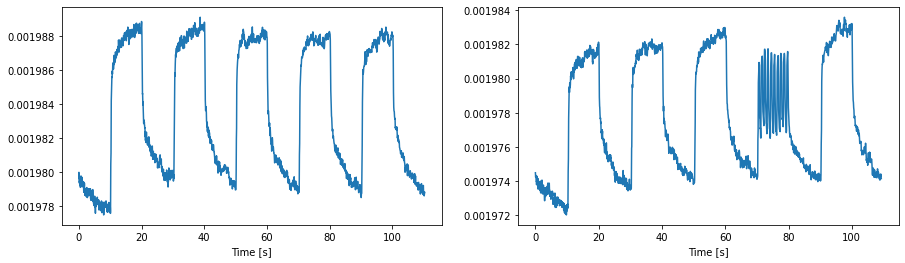

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,4))
ax = axes.flatten()

df_normal.plot(legend=False, ax=ax[0])
df_abnormal.plot(legend=False, ax=ax[1])

plt.show()

## **데이터 선택부분**

In [ ]:
df_normal = df_normal
df_abnormal = df_abnormal

In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.}
training_mean = df_normal.mean()
training_std = df_normal.std()
df_training_value = (df_normal - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 1946


In [ ]:
TIME_STEPS = 196 *2

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (1554, 392, 1)


In [ ]:
x_train.shape[1]

392

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=10, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=10, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=10, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=10, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=10, padding="same"),
    ]
)


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 196, 32)           352       
_________________________________________________________________
dropout_2 (Dropout)          (None, 196, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 98, 16)            5136      
_________________________________________________________________
conv1d_transpose_3 (Conv1DTr (None, 196, 16)           2576      
_________________________________________________________________
dropout_3 (Dropout)          (None, 196, 16)           0         
_________________________________________________________________
conv1d_transpose_4 (Conv1DTr (None, 392, 32)           5152      
_________________________________________________________________
conv1d_transpose_5 (Conv1DTr (None, 392, 1)           

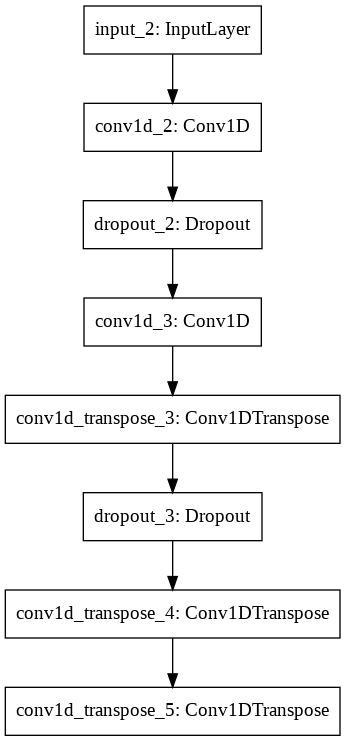

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
11/11 [==============================] - 3s 171ms/step - loss: 0.9660 - val_loss: 0.3976
Epoch 2/50
11/11 [==============================] - 2s 147ms/step - loss: 0.4153 - val_loss: 0.1018
Epoch 3/50
11/11 [==============================] - 2s 144ms/step - loss: 0.1028 - val_loss: 0.0398
Epoch 4/50
11/11 [==============================] - 1s 135ms/step - loss: 0.0562 - val_loss: 0.0297
Epoch 5/50
11/11 [==============================] - 2s 146ms/step - loss: 0.0408 - val_loss: 0.0290
Epoch 6/50
11/11 [==============================] - 2s 150ms/step - loss: 0.0361 - val_loss: 0.0219
Epoch 7/50
11/11 [==============================] - 2s 139ms/step - loss: 0.0316 - val_loss: 0.0193
Epoch 8/50
11/11 [==============================] - 2s 147ms/step - loss: 0.0288 - val_loss: 0.0175
Epoch 9/50
11/11 [==============================] - 2s 147ms/step - loss: 0.0266 - val_loss: 0.0169
Epoch 10/50
11/11 [==============================] - 2s 146ms/step - loss: 0.0251 - val_loss: 0.0158

In [ ]:
print(sum(history.history["val_loss"][-5:])/5)

0.011954711563885213


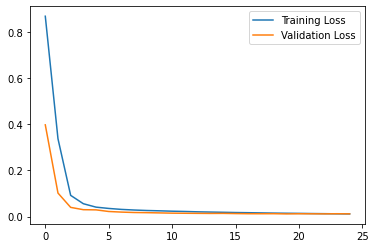

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

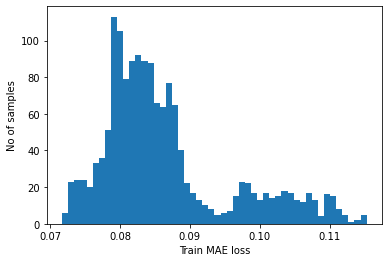

Reconstruction error threshold:  0.11526972171392308


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

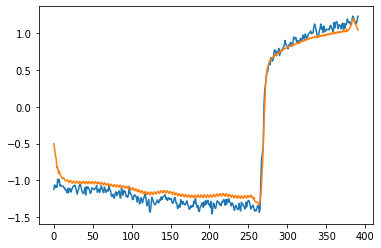

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[55])
plt.plot(x_train_pred[55])
plt.show()

In [ ]:
def normalize_test(values, mean, std):
    values -= mean
    values /= std
    return values


df_test_value = (df_abnormal - training_mean) / training_std


In [ ]:
# Create sequences from test values.
x_test = create_sequences(df_test_value.values)

print("Test input shape: ", x_test.shape)

Test input shape:  (1548, 392, 1)


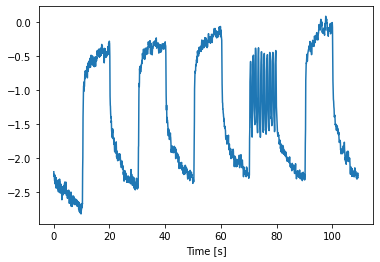

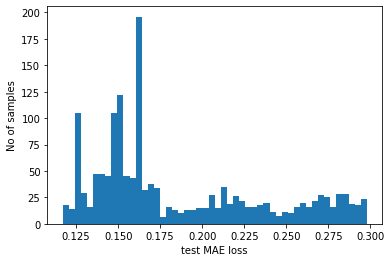

Number of anomaly samples:  1548
Indices of anomaly samples:  (array([   0,    1,    2, ..., 1545, 1546, 1547]),)


In [ ]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

df_test_value = (df_abnormal - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
print(threshold)

0.11526972171392308


In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

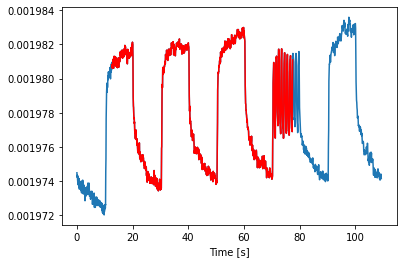

In [ ]:
df_subset = df_abnormal.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_abnormal.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# 반복문 활용한 알고리즘 성능 강화 (kernel size 변경)

In [ ]:
val_loss_data =[]

for i in range(6):
  
  TIME_STEPS = 196 * 2

  # Generated training sequences for use in the model.
  def create_sequences(values, time_steps=TIME_STEPS):
      output = []
      for r in range(len(values) - time_steps):
          output.append(values[r : (r + time_steps)])
      return np.stack(output)
  
  x_train = create_sequences(df_training_value.values)
  print("Training input shape: ", x_train.shape)

  model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=3+i, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=3+i, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=3+i, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=3+i, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=3+i, padding="same"),
    ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
  model.summary()
  
  history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],)

  print(sum(history.history["val_loss"][-5:])/5)

  val_loss_data.append(sum(history.history["val_loss"][-5:])/5)

Training input shape:  (1554, 392, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 196, 32)           128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 196, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 16)            1552      
_________________________________________________________________
conv1d_transpose_6 (Conv1DTr (None, 196, 16)           784       
_________________________________________________________________
dropout_5 (Dropout)          (None, 196, 16)           0         
_________________________________________________________________
conv1d_transpose_7 (Conv1DTr (None, 392, 32)           1568      
_________________________________________________________________
conv1d_transpose

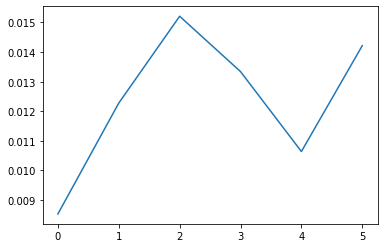

In [ ]:
 # Checking how the first sequence is learnt
plt.plot(val_loss_data)
plt.show()

# 두개의 후보군 (kernel size : 3 또는 7) 중 7을 선택하여 모델 재구성

In [ ]:
TIME_STEPS = 196 *2

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)


model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Training input shape:  (1554, 392, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 196, 32)           256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 196, 32)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 98, 16)            3600      
_________________________________________________________________
conv1d_transpose_45 (Conv1DT (None, 196, 16)           1808      
_________________________________________________________________
dropout_31 (Dropout)         (None, 196, 16)           0         
_________________________________________________________________
conv1d_transpose_46 (Conv1DT (None, 392, 32)           3616      
_________________________________________________________________
conv1d_transpos

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
11/11 [==============================] - 2s 159ms/step - loss: 0.9107 - val_loss: 0.4314
Epoch 2/50
11/11 [==============================] - 1s 126ms/step - loss: 0.3035 - val_loss: 0.0974
Epoch 3/50
11/11 [==============================] - 1s 134ms/step - loss: 0.0879 - val_loss: 0.0571
Epoch 4/50
11/11 [==============================] - 1s 135ms/step - loss: 0.0602 - val_loss: 0.0270
Epoch 5/50
11/11 [==============================] - 1s 131ms/step - loss: 0.0422 - val_loss: 0.0257
Epoch 6/50
11/11 [==============================] - 1s 128ms/step - loss: 0.0358 - val_loss: 0.0207
Epoch 7/50
11/11 [==============================] - 1s 132ms/step - loss: 0.0320 - val_loss: 0.0199
Epoch 8/50
11/11 [==============================] - 1s 134ms/step - loss: 0.0287 - val_loss: 0.0183
Epoch 9/50
11/11 [==============================] - 1s 135ms/step - loss: 0.0267 - val_loss: 0.0179
Epoch 10/50
11/11 [==============================] - 1s 132ms/step - loss: 0.0254 - val_loss: 0.0171

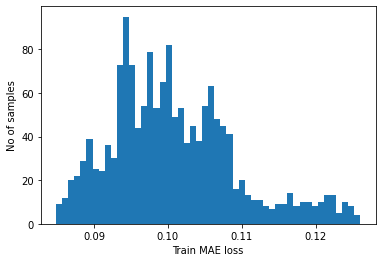

Reconstruction error threshold:  0.12605830542382152


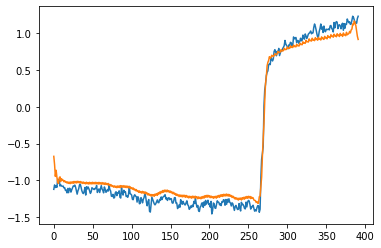

Test input shape:  (1548, 392, 1)


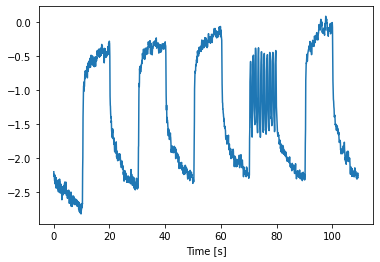

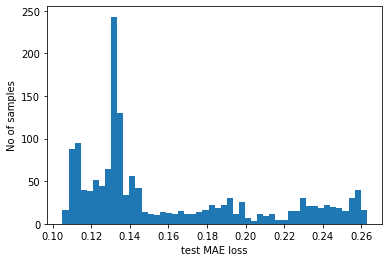

Number of anomaly samples:  1191
Indices of anomaly samples:  (array([   0,    1,    2, ..., 1545, 1546, 1547]),)
0.12605830542382152


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

# Checking how the first sequence is learnt
plt.plot(x_train[55])
plt.plot(x_train_pred[55])
plt.show()

def normalize_test(values, mean, std):
    values -= mean
    values /= std
    return values


df_test_value = (df_abnormal - training_mean) / training_std

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)

print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

df_test_value = (df_abnormal - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

print(threshold)

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

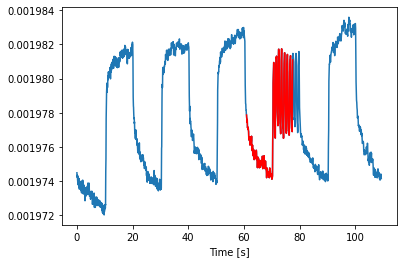

In [ ]:
df_subset = df_abnormal.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_abnormal.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()